# Craft A Story from a dataset

Narrative: Higher education provides higher income.



In [1]:
#load python packages
import os
import pandas as pd
import pandas.api.types as ptypes
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings # For handling error messages.
#warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("adult.csv")
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df_sel = df[['workclass','education','educational-num','native-country','income']]

In [8]:
df_sel['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [9]:
df_sel['workclass'] = df_sel['workclass'].replace('?','Unknown')

In [10]:
df_sel['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Unknown              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [11]:
df_sel['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [12]:
df_sel['educational-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

In [13]:
df_sel['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [14]:
df_sel['native-country'] = df_sel['native-country'].replace('?', 'Unknown')

In [15]:
df_sel['native-country'].value_counts()

United-States                 43832
Mexico                          951
Unknown                         857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [16]:
df_sel['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [17]:
df_ed_inc = df_sel[['education','income']]
df_ed_inc.head()

,education,income
0,11th,<=50K
1,HS-grad,<=50K
2,Assoc-acdm,>50K
3,Some-college,>50K
4,Some-college,<=50K


In [18]:
df_ed_inc['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [19]:
len(df_ed_inc[(df_ed_inc['education'] == '11th') & (df_ed_inc['income'] == '<=50K')])

1720

In [20]:
dfei = pd.DataFrame(columns=['education','income','Value','Percentage'])

In [21]:
i = 0
for val in df_ed_inc['education'].unique():
    print(val)
    dfei.loc[i,'education'] = val
    dfei.loc[i,'income'] = '<=50K'
    dfei.loc[i,'Value'] = len(df_ed_inc[(df_ed_inc['education'] == val) & (df_ed_inc['income'] == '<=50K')])
    i = i + 1
    dfei.loc[i,'education'] = val
    dfei.loc[i,'income'] = '>50K'
    dfei.loc[i,'Value'] = len(df_ed_inc[(df_ed_inc['education'] == val) & (df_ed_inc['income'] == '>50K')])
    
    dfei.loc[i-1,'Percentage'] =  dfei.loc[i-1,'Value'] / (dfei.loc[i-1,'Value'] + dfei.loc[i,'Value'])
    dfei.loc[i,'Percentage'] =  dfei.loc[i,'Value'] / (dfei.loc[i-1,'Value'] + dfei.loc[i,'Value'])
    
    i = i + 1

11th
HS-grad
Assoc-acdm
Some-college
10th
Prof-school
7th-8th
Bachelors
Masters
Doctorate
5th-6th
Assoc-voc
9th
12th
1st-4th
Preschool


In [22]:
dfei

,education,income,Value,Percentage
0,11th,<=50K,1720,0.949227
1,11th,>50K,92,0.0507726
2,HS-grad,<=50K,13281,0.841422
3,HS-grad,>50K,2503,0.158578
4,Assoc-acdm,<=50K,1188,0.742036
5,Assoc-acdm,>50K,413,0.257964
6,Some-college,<=50K,8815,0.810351
7,Some-college,>50K,2063,0.189649
8,10th,<=50K,1302,0.937365
9,10th,>50K,87,0.062635


In [23]:
dfei['Value'] = pd.to_numeric(dfei['Value'])
dfei['Percentage'] = pd.to_numeric(dfei['Percentage'])
dfei = dfei.sort_values("Percentage")

In [24]:
df_gt_50k = dfei[dfei['income'] == '>50K']
df_gt_50k

,education,income,Value,Percentage
31,Preschool,>50K,1,0.012048
29,1st-4th,>50K,8,0.032389
1,11th,>50K,92,0.050773
21,5th-6th,>50K,27,0.053045
25,9th,>50K,41,0.054233
9,10th,>50K,87,0.062635
13,7th-8th,>50K,62,0.064921
27,12th,>50K,48,0.073059
3,HS-grad,>50K,2503,0.158578
7,Some-college,>50K,2063,0.189649


In [25]:
df_gt_50k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 31 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   education   16 non-null     object 
 1   income      16 non-null     object 
 2   Value       16 non-null     int64  
 3   Percentage  16 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 640.0+ bytes


In [26]:
df_lte_50k = dfei[dfei['income'] == '<=50K']
df_lte_50k

,education,income,Value,Percentage
10,Prof-school,<=50K,217,0.260192
18,Doctorate,<=50K,163,0.274411
16,Masters,<=50K,1198,0.450884
14,Bachelors,<=50K,4712,0.587165
4,Assoc-acdm,<=50K,1188,0.742036
22,Assoc-voc,<=50K,1539,0.746725
6,Some-college,<=50K,8815,0.810351
2,HS-grad,<=50K,13281,0.841422
26,12th,<=50K,609,0.926941
12,7th-8th,<=50K,893,0.935079


In [27]:
df_lte_50k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 10 to 30
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   education   16 non-null     object 
 1   income      16 non-null     object 
 2   Value       16 non-null     int64  
 3   Percentage  16 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 640.0+ bytes


In [28]:
dfei_wide = dfei.pivot("education","income","Value")

In [29]:
dfei_wide

income,<=50K,>50K
education,,
10th,1302,87
11th,1720,92
12th,609,48
1st-4th,239,8
5th-6th,482,27
7th-8th,893,62
9th,715,41
Assoc-acdm,1188,413
Assoc-voc,1539,522


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

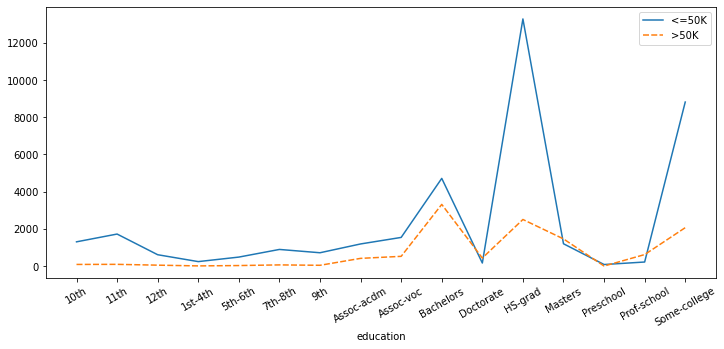

In [30]:
plt.figure(figsize=(12,5))
p = sns.lineplot(data=dfei_wide)
plt.setp(p.get_xticklabels(), rotation=30)

In [31]:
dfei_wide_p = dfei.pivot("education","income","Percentage")
dfei_wide_p

income,<=50K,>50K
education,,
10th,0.937365,0.062635
11th,0.949227,0.050773
12th,0.926941,0.073059
1st-4th,0.967611,0.032389
5th-6th,0.946955,0.053045
7th-8th,0.935079,0.064921
9th,0.945767,0.054233
Assoc-acdm,0.742036,0.257964
Assoc-voc,0.746725,0.253275


Text(0.5, 1.0, 'Education vs Income')

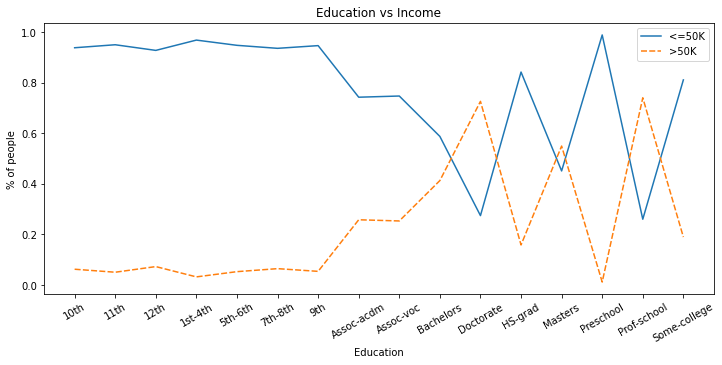

In [32]:
plt.figure(figsize=(12,5))
p = sns.lineplot(data=dfei_wide_p)
plt.setp(p.get_xticklabels(), rotation=30)
plt.xlabel('Education')
plt.ylabel('% of people')
plt.title('Education vs Income')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

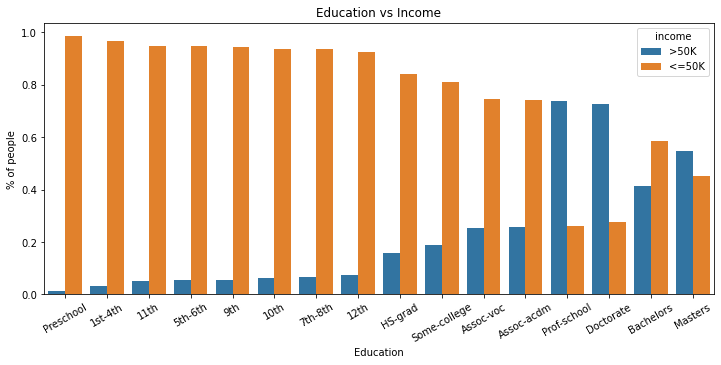

In [33]:
plt.figure(figsize=(12,5))
g = sns.barplot(x="education", y="Percentage", hue="income", data = dfei)
plt.xlabel('Education')
plt.ylabel('% of people')
plt.title('Education vs Income')
plt.setp(g.get_xticklabels(), rotation=30)

# Higher percentage of people who did Prof_school, Doctorate and Masters degree earned >50K.

## Why is % of people that did Bachelors degree that earned >50K lesser than those that earned <=50K?

In [37]:
df_bs = df_sel[df_sel['education'] == 'Bachelors']
df_bs.head()

,workclass,education,educational-num,native-country,income
11,Federal-gov,Bachelors,13,United-States,<=50K
20,Private,Bachelors,13,United-States,>50K
23,Private,Bachelors,13,Peru,<=50K
24,Private,Bachelors,13,United-States,<=50K
32,Self-emp-not-inc,Bachelors,13,United-States,<=50K


In [39]:
df_bs.shape

(8025, 5)

In [41]:
df_bs["native-country"].value_counts()

United-States                 7184
Unknown                        210
Philippines                    105
Germany                         50
Mexico                          43
Canada                          38
India                           37
England                         34
South                           30
China                           29
Japan                           26
Taiwan                          22
Cuba                            19
Iran                            18
Puerto-Rico                     17
Vietnam                         17
Italy                           14
Poland                          13
Jamaica                         10
France                          10
El-Salvador                      8
Peru                             8
Ireland                          8
Thailand                         6
Dominican-Republic               6
Columbia                         6
Hong                             6
Cambodia                         5
Greece              

In [42]:
# Over 7/8 of Bachelors degreee observations are in United States.
# Dropping all other countries
df_bs = df_bs[df_bs["native-country"] == "United-States"]

In [44]:
df_bs["native-country"].value_counts()

United-States    7184
Name: native-country, dtype: int64

In [43]:
df_bs["workclass"].value_counts()

Private             4713
Local-gov            653
Self-emp-not-inc     531
State-gov            404
Self-emp-inc         376
Federal-gov          288
Unknown              219
Name: workclass, dtype: int64

In [46]:
df_bs = df_bs[["workclass","income"]]
df_bs.head()

,workclass,income
11,Federal-gov,<=50K
20,Private,>50K
24,Private,<=50K
32,Self-emp-not-inc,<=50K
36,Local-gov,>50K


In [49]:
df_bs = df_bs.sort_values("workclass")

In [52]:
df_bs[df_bs["income"] == ">50K"]["workclass"].value_counts()

Private             2014
Self-emp-inc         239
Self-emp-not-inc     220
Local-gov            217
Federal-gov          139
State-gov            135
Unknown               56
Name: workclass, dtype: int64

## Majority of people with Bachelors education are in United-States. 

## 42% of people with Bachelors education in United-Stated worked in Private workclass and earned >50K.

# Check Masters education data

In [53]:
df_ms = df_sel[df_sel['education'] == 'Masters']
df_ms.head()

,workclass,education,educational-num,native-country,income
15,Private,Masters,14,United-States,>50K
40,Private,Masters,14,United-States,>50K
62,Private,Masters,14,United-States,<=50K
89,Unknown,Masters,14,United-States,>50K
92,Private,Masters,14,United-States,>50K


In [54]:
df_ms.shape

(2657, 5)

In [55]:
df_ms["native-country"].value_counts()

United-States         2349
Unknown                 78
India                   36
China                   24
Taiwan                  16
England                 12
Canada                  11
Philippines             11
Japan                   11
Iran                    10
South                    9
Mexico                   9
Cuba                     9
Germany                  8
Poland                   8
France                   7
Italy                    6
Hong                     5
Greece                   5
Jamaica                  4
Ecuador                  3
El-Salvador              3
Trinadad&Tobago          3
Dominican-Republic       3
Nicaragua                3
Hungary                  2
Haiti                    2
Scotland                 2
Peru                     2
Thailand                 2
Puerto-Rico              1
Ireland                  1
Columbia                 1
Portugal                 1
Name: native-country, dtype: int64

In [56]:
df_ms = df_ms[df_ms["native-country"] == "United-States"]

In [57]:
df_ms["workclass"].value_counts()

Private             1194
Local-gov            501
State-gov            223
Self-emp-not-inc     187
Self-emp-inc          94
Federal-gov           90
Unknown               60
Name: workclass, dtype: int64

In [58]:
df_ms[df_ms["income"] == ">50K"]["workclass"].value_counts()

Private             702
Local-gov           267
State-gov           100
Self-emp-not-inc     85
Self-emp-inc         68
Federal-gov          61
Unknown              27
Name: workclass, dtype: int64

## 59% of people with Masters education in United-States worked for Private workclass and earned >50K.

# Check Doctorate education data

In [59]:
df_phd = df_sel[df_sel['education'] == 'Doctorate']
df_phd.head()

,workclass,education,educational-num,native-country,income
19,Private,Doctorate,16,Unknown,>50K
126,Federal-gov,Doctorate,16,United-States,>50K
133,Self-emp-inc,Doctorate,16,United-States,>50K
166,Self-emp-not-inc,Doctorate,16,United-States,>50K
329,Self-emp-not-inc,Doctorate,16,Unknown,>50K


In [60]:
df_phd.shape

(594, 5)

In [61]:
df_phd["native-country"].value_counts()

United-States    478
Unknown           32
China             13
Canada            11
Taiwan            11
India             10
England            7
Germany            6
Iran               5
France             3
Cuba               2
Japan              2
Jamaica            2
Hong               2
South              2
Columbia           1
Italy              1
Thailand           1
Poland             1
Vietnam            1
Nicaragua          1
Mexico             1
El-Salvador        1
Name: native-country, dtype: int64

In [62]:
df_phd = df_phd[df_phd["native-country"] == "United-States"]

In [64]:
df_phd["workclass"].value_counts()

Private             206
State-gov            96
Self-emp-not-inc     66
Self-emp-inc         48
Local-gov            30
Unknown              16
Federal-gov          16
Name: workclass, dtype: int64

In [65]:
df_phd[df_phd["income"] == ">50K"]["workclass"].value_counts()

Private             148
State-gov            75
Self-emp-not-inc     45
Self-emp-inc         40
Local-gov            20
Federal-gov          14
Unknown              11
Name: workclass, dtype: int64

## 72% of people with Doctorate education in United-States worked for Private workclass and earned >50K.

# Conclusion:  Higher education and employment in Private workclass provides higher income.